In [1]:
%matplotlib inline

# Gear shifts on track

Plot which gear is being used at which point of the track


Import FastF1 and load the data



In [2]:
import fastf1

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib import cm
import numpy as np


fastf1.Cache.enable_cache('cache')  # replace with your cache directory

session = fastf1.get_session(2022, 10, 'Q')
session.load()

lap = session.laps.pick_fastest()
tel = lap.get_telemetry()

core           INFO 	Loading data for British Grand Prix - Qualifying [v2.2.8]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['55', '1', '16', '11', '44', '4', '14', '63', '24', '6', '10', '77', '22', '3', '31', '23', '20', '5', '47', '18']


Prepare the data for plotting by converting it to the appropriate numpy
data types



In [3]:
x = np.array(tel['X'].values)
y = np.array(tel['Y'].values)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
gear = tel['nGear'].to_numpy().astype(float)

Create a line collection. Set a segmented colormap and normalize the plot
to full integer values of the colormap



In [4]:
cmap = cm.get_cmap('Paired')
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(gear)
lc_comp.set_linewidth(4)

Create the plot



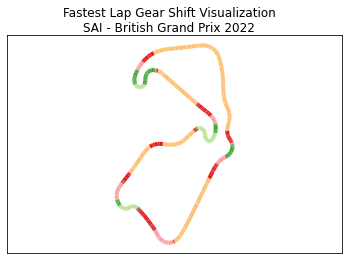

In [5]:
plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

title = plt.suptitle(
    f"Fastest Lap Gear Shift Visualization\n"
    f"{lap['Driver']} - {session.event['EventName']} {session.event.year}"
)

Add a colorbar to the plot. Shift the colorbar ticks by +0.5 so that they
are centered for each color segment.



/var/folders/4g/fy11b71x7jsd5j1s4bztn7gm0000gn/T/ipykernel_75975/3174691261.py:1: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cbar = plt.colorbar(mappable=lc_comp, label="Gear", boundaries=np.arange(1, 10))


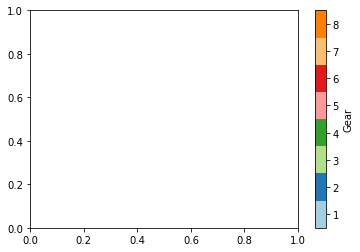

In [6]:
cbar = plt.colorbar(mappable=lc_comp, label="Gear", boundaries=np.arange(1, 10))
cbar.set_ticks(np.arange(1.5, 9.5))
cbar.set_ticklabels(np.arange(1, 9))


plt.show()